In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
# Loading the dataset
data = pd.read_csv("Language Detection.csv")

In [3]:
# value count for each language
data["Language"].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

In [4]:
# separating the independent and dependant features
X = data["Text"]
y = data["Language"]

In [5]:
# converting categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
# creating a list for appending the preprocessed text
data_list = []
for text in X:
    # removing the symbols and numbers
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    # converting the text to lower case
    text = text.lower()
    # appending to data_list
    data_list.append(text)

In [7]:
# creating bag of words using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [8]:
#train test splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [9]:
#model creation and predict
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [10]:
# prediction
y_pred = model.predict(x_test)

In [11]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [12]:
print("Accuracy is :",ac)

Accuracy is : 0.9763056092843327


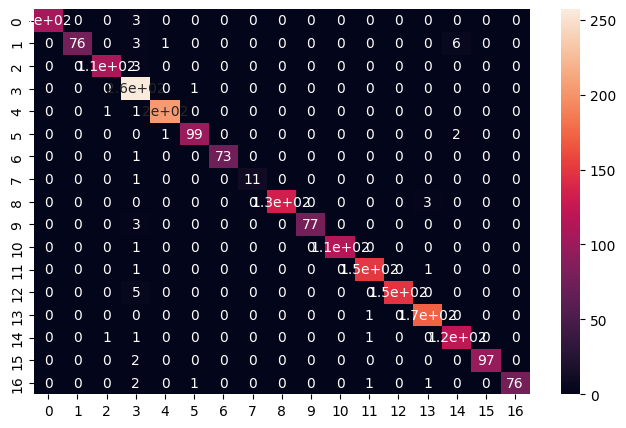

In [13]:
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot = True)
plt.show()

In [14]:
# function for predicting language
def prediction(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print("The langauge is in",lang[0])

In [25]:
# English
prediction("I love programming, Python is my favorite language.")
# French
prediction("J'adore programmer, Python est mon langage préféré.")
# Spanish
prediction("Me encanta programar, Python es mi lenguaje favorito.")
# Portugeese
prediction("Eu amo programar, Python é minha linguagem favorita.")
# Italian
prediction("Amo programmare, Python è il mio linguaggio preferito.")
# Russian
prediction("Я люблю программировать, Python — мой любимый язык.")
# Sweedish
prediction("Jag älskar programmering, Python är mitt favoritspråk.")
# Malayalam
prediction("എനിക്ക് പ്രോഗ്രാമിംഗ് ഇഷ്ടമാണ്, പൈത്തൺ എന്റെ പ്രിയപ്പെട്ട ഭാഷയാണ്.")
# Dutch
prediction("Ik hou van programmeren, Python is mijn favoriete taal.")
# Arabic
prediction("أحب البرمجة ، بايثون هي لغتي المفضلة.")
# Turkish
prediction("Programlamayı seviyorum, Python benim favori dilim.")
# German
prediction("Ich liebe das Programmieren, Python ist meine Lieblingssprache.")
# Tamil
prediction("நான் நிரலாக்கத்தை விரும்புகிறேன், பைதான் எனக்கு மிகவும் பிடித்த மொழி.")
# Danish
prediction("Jeg elsker programmering, Python er mit yndlingssprog.")
# Kannada
prediction(
    "ನಾನು ಪ್ರೋಗ್ರಾಮಿಂಗ್ ಅನ್ನು ಇಷ್ಟಪಡುತ್ತೇನೆ, ಪೈಥಾನ್ ನನ್ನ ನೆಚ್ಚಿನ ಭಾಷೆಯಾಗಿದೆ.")
# Greek
prediction("Λατρεύω τον προγραμματισμό, η Python είναι η αγαπημένη μου γλώσσα.")
# Hindi
prediction(" पायथन  है।")
# prediction("मुझे प्रोग्रामिंग पसंद है, पायथन मेरी पसंदीदा भाषा है।")


The langauge is in English
The langauge is in French
The langauge is in Spanish
The langauge is in Portugeese
The langauge is in Italian
The langauge is in Russian
The langauge is in Sweedish
The langauge is in Malayalam
The langauge is in Dutch
The langauge is in Arabic
The langauge is in Turkish
The langauge is in German
The langauge is in Tamil
The langauge is in Danish
The langauge is in Kannada
The langauge is in Greek
The langauge is in English


In [16]:
# read file sentences.txt 
sentences = open('sentences.txt',encoding='utf-8')
# sentences = open('sentences.txt','r')
for sentence in sentences:
        # print(sentence)
        prediction(sentence)

The langauge is in English
The langauge is in Arabic
The langauge is in English
The langauge is in Spanish
The langauge is in Portugeese


In [21]:
# take user input from user to predict language
user_text = input()
prediction(user_text)

The langauge is in English
